In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_venue = pd.read_csv("https://raw.githubusercontent.com/firdthebird/Capstone/master/venue.csv")
df_venue =df_venue.drop(df_venue.columns[0], axis=1)
df_venue

,Location,Entertainment,Food & Beverages,Lodging,Other
0,Austin,14,13,2,4
1,Chicago,7,18,3,2
2,Seattle,4,19,3,4


In [3]:
df_venue.drop(["Location"], axis = 1, inplace = True)
df_venue

,Entertainment,Food & Beverages,Lodging,Other
0,14,13,2,4
1,7,18,3,2
2,4,19,3,4


In [4]:
data_scaled = normalize(df_venue)
data_scaled = pd.DataFrame(data_scaled, columns=df_venue.columns)
data_scaled.head()

,Entertainment,Food & Beverages,Lodging,Other
0,0.713506,0.662541,0.101929,0.203859
1,0.356291,0.916176,0.152696,0.101797
2,0.199502,0.947634,0.149626,0.199502


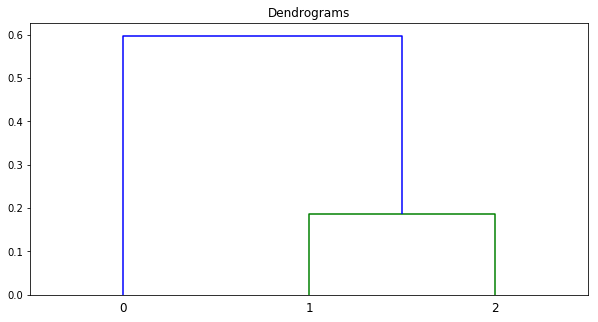

In [5]:
plt.figure(figsize=(10, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

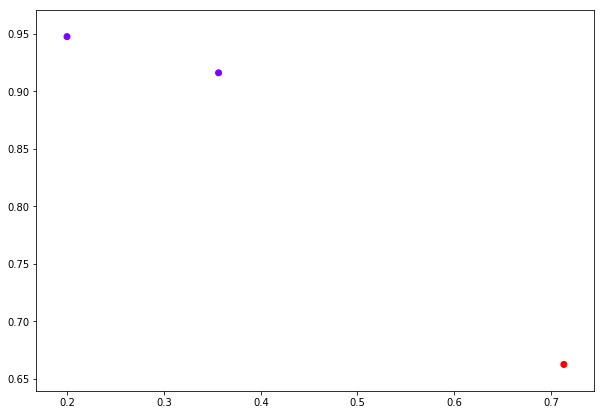

In [6]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
#plt.figure(figsize=(10, 7))  
#plt.scatter(data_scaled['Cost of Living Plus Rent Index'], data_scaled['Restaurant Price Index'], c=cluster.labels_) 
plt.figure(figsize=(10, 7))
df =data_scaled.to_numpy()
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')